In [31]:
import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
data = pd.read_csv("Wine.csv")

In [33]:
data.sample(5)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
39,1,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760
164,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615
139,3,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [35]:
sns.pairplot(data, hue="Class")

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

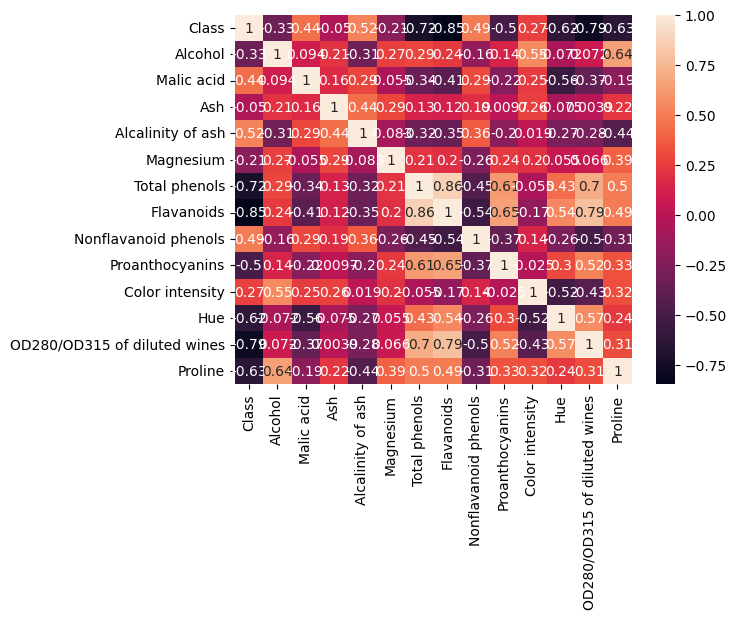

In [36]:
sns.heatmap(data.corr(), annot=True)

In [37]:
X, Y = data.drop(columns=["Class"]), data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
nbc_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes accuracy: {nbc_accuracy}")

Naive Bayes accuracy: 0.9722222222222222


In [38]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"LDA accuracy: {lda_accuracy}")

LDA accuracy: 1.0


In [39]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, y_pred)
print(f"QDA accuracy: {qda_accuracy}")

QDA accuracy: 1.0


In [40]:
data = data.drop(columns=["Ash"])
#So otstranuvanje na kolonata Ash se namaluva separabilnosta i doagja do podobruvanje na qda
#Ash mozhebi voveduvala linearna zavisnost megju klasite -> i vo takov sluchaj lda dava najgolema tochnost
#Koga ke ja otstranime, posoodvetni rezultati bi dala qda bidejki modelira linearni granici

In [41]:
X, Y = data.drop(columns=["Class"]), data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
nbc_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes accuracy: {nbc_accuracy}")

Naive Bayes accuracy: 0.9166666666666666


In [42]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"LDA accuracy: {lda_accuracy}")

LDA accuracy: 0.9444444444444444


In [43]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, y_pred)
print(f"QDA accuracy: {qda_accuracy}")

QDA accuracy: 0.9444444444444444


In [44]:
#QDA овозможува користење на различни коваријантни матрици за секоја класа, што значи дека подобро се приспособува на новата распределба на податоците.